# **TF-IDF**

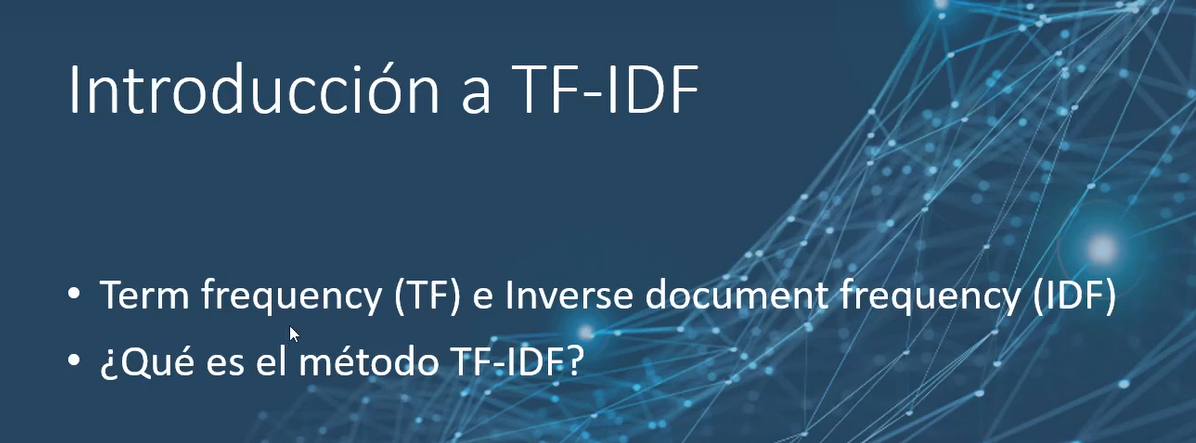

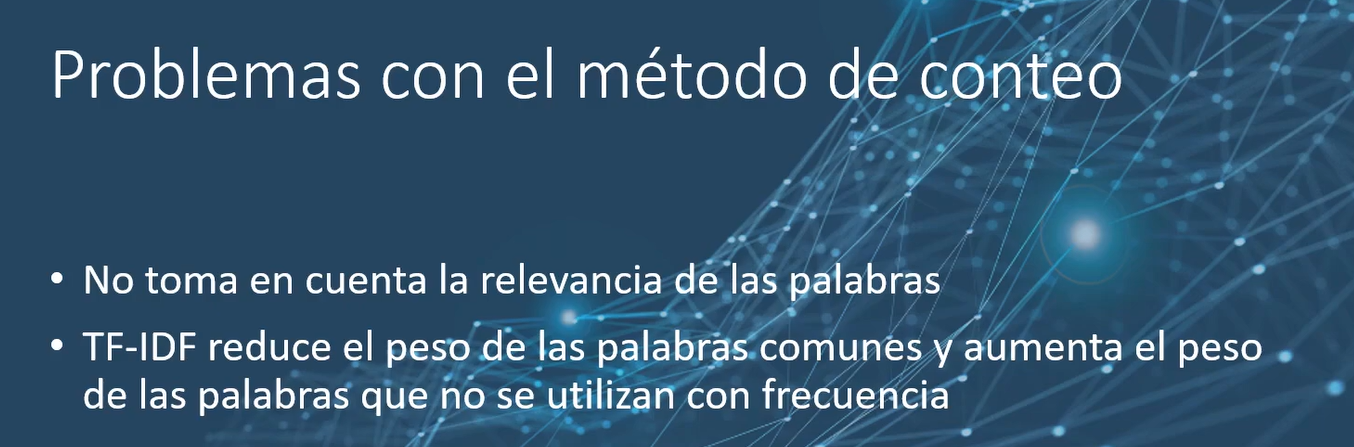

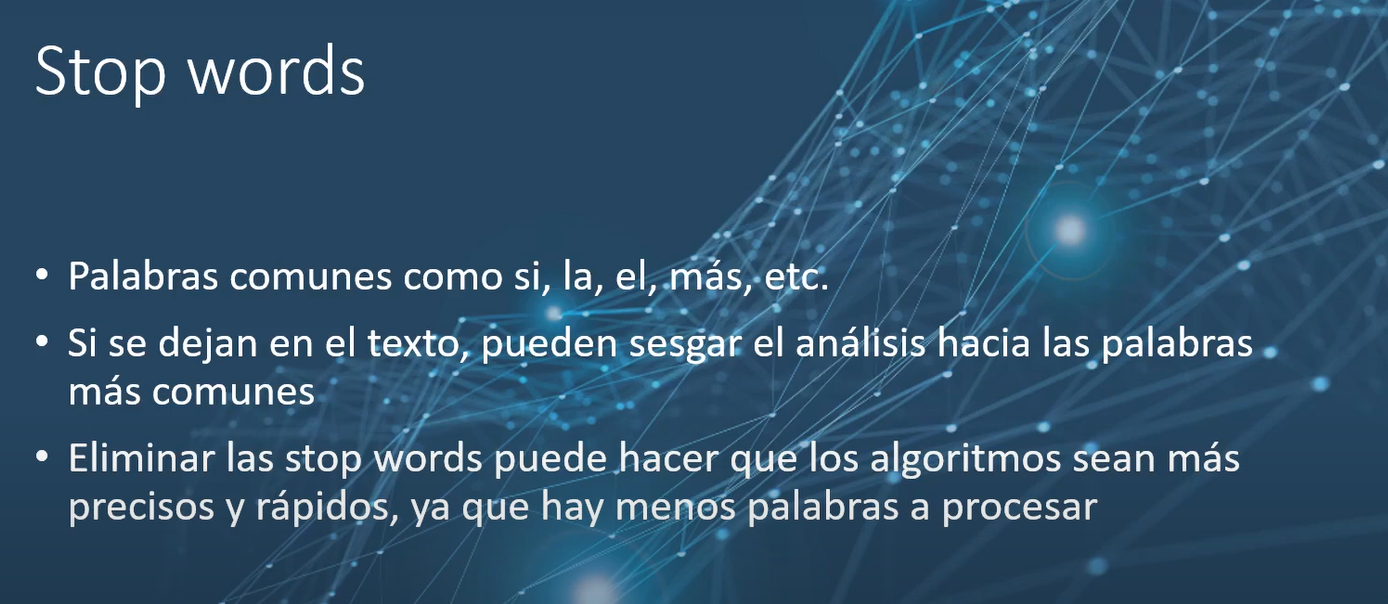

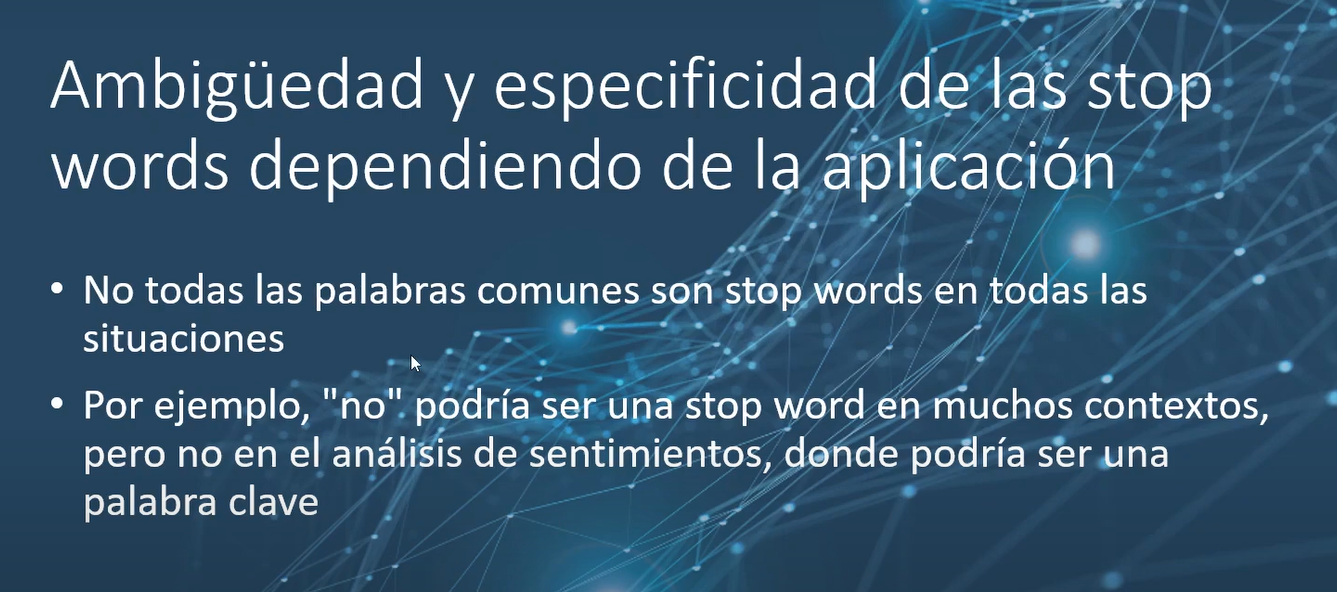


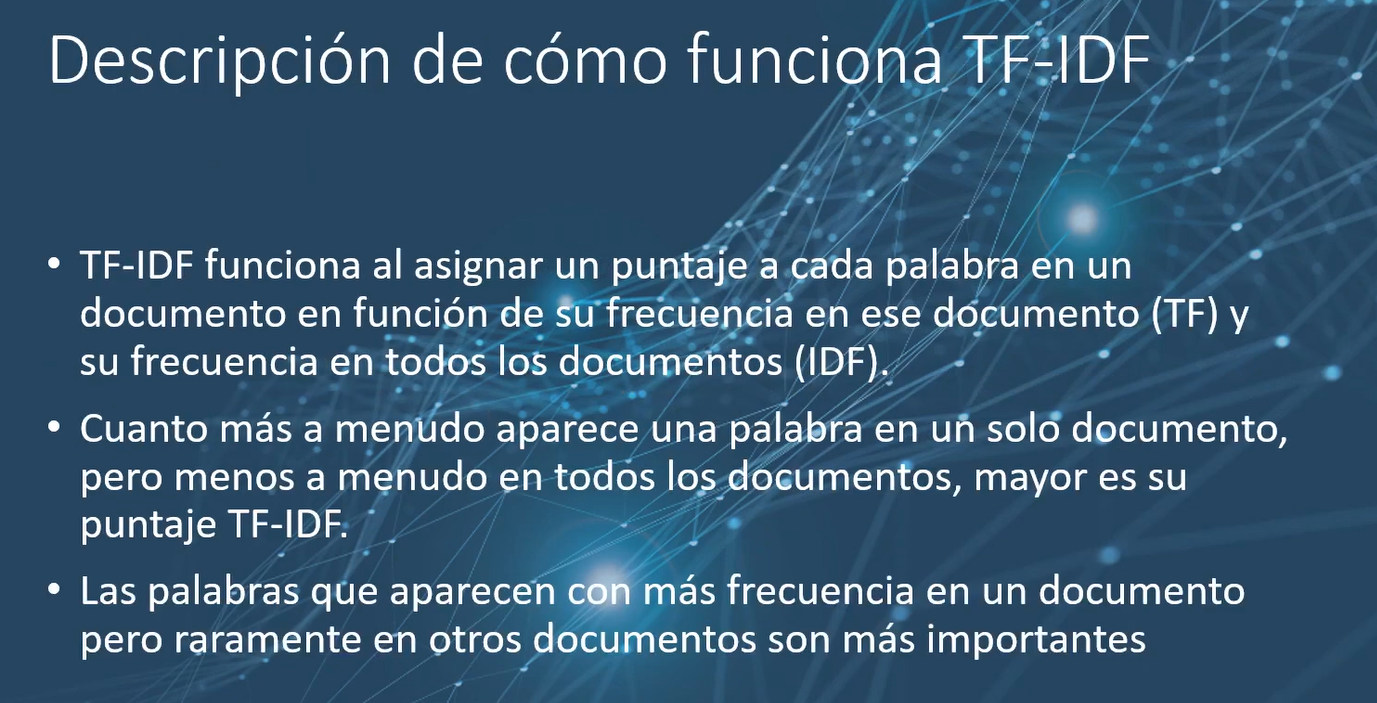

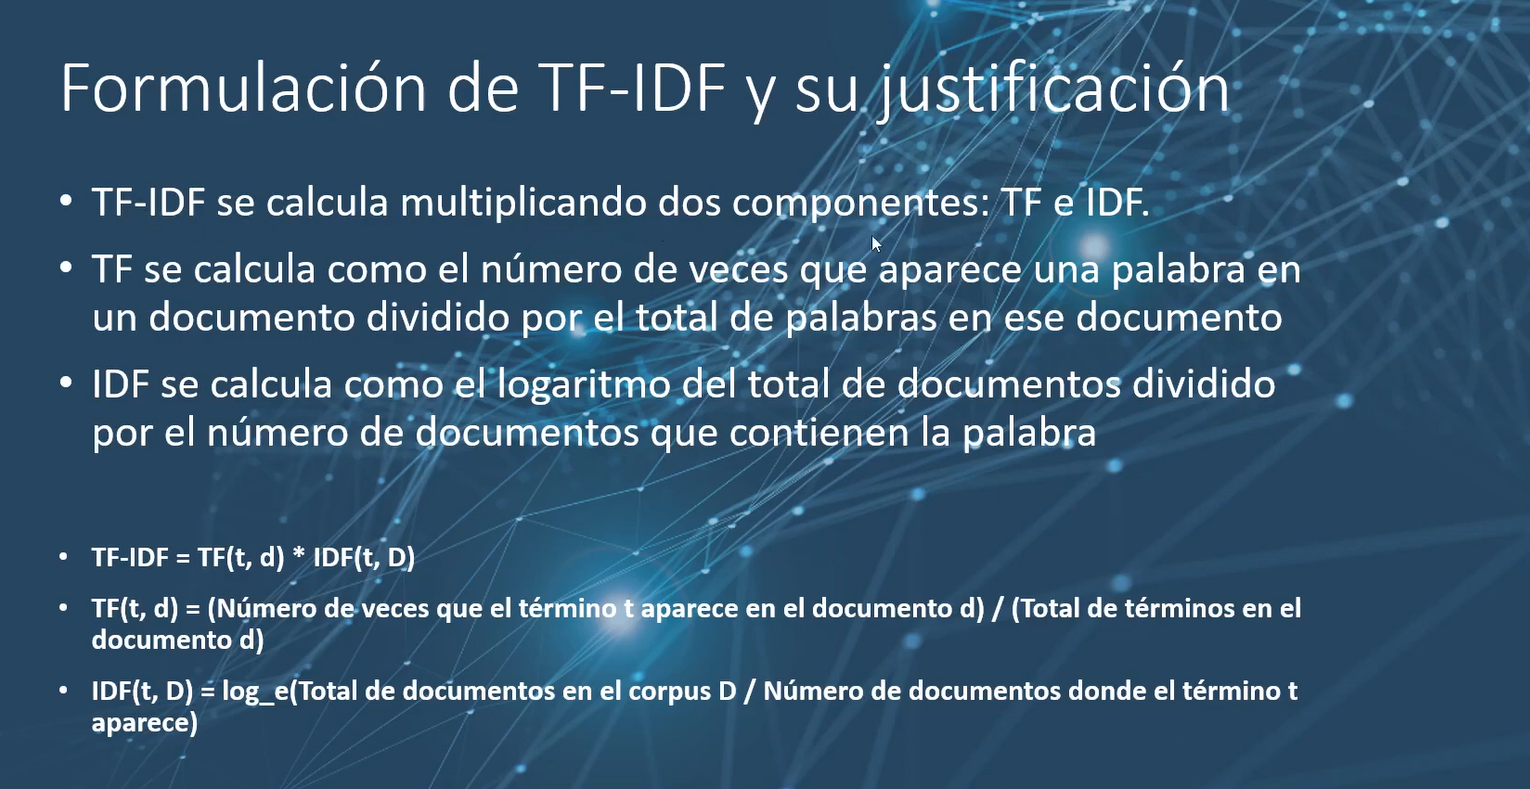

In [2]:
import pandas as pd

In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Access the file (replace 'path_to_your_file' with the actual path)
file_path = '/content/drive/MyDrive/Curso-ProcesamientoNatural(NLP)/MetodoTF-IDF/movie_metadata.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv('/content/drive/MyDrive/Curso-ProcesamientoNatural(NLP)/MetodoTF-IDF/movie_metadata.csv')
df.head()

Id                                        movie_title  \
0   1                                            Avatar    
1   2          Pirates of the Caribbean: At World's End    
2   3                                           Spectre    
3   4                             The Dark Knight Rises    
4   5  Star Wars: Episode VII - The Force Awakens    ...   

                            genero  \
0  Action|Adventure|Fantasy|Sci-Fi   
1         Action|Adventure|Fantasy   
2        Action|Adventure|Thriller   
3                  Action|Thriller   
4                      Documentary   

                                       plot_keywords      director_name  \
0             avatar|future|marine|native|paraplegic      James Cameron   
1  goddess|marriage ceremony|marriage proposal|pi...     Gore Verbinski   
2                bomb|espionage|sequel|spy|terrorist         Sam Mendes   
3  deception|imprisonment|lawlessness|police offi...  Christopher Nolan   
4                                                NaN        Doug Walker   

   num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
4                     NaN       NaN                    131.0   

   actor_3_facebook_likes      actor_2_name  ...  num_user_for_reviews  \
0                   855.0  Joel David Moore  ...                3054.0   
1                  1000.0     Orlando Bloom  ...                1238.0   
2                   161.0      Rory Kinnear  ...                 994.0   
3                 23000.0    Christian Bale  ...                2701.0   
4                     NaN        Rob Walker  ...                   NaN   

   language  country content_rating       budget  title_year  \
0   English      USA          PG-13  237000000.0      2009.0   
1   English      USA          PG-13  300000000.0      2007.0   
2   English       UK          PG-13  245000000.0      2015.0   
3   English      USA          PG-13  250000000.0      2012.0   
4       NaN      NaN            NaN          NaN         NaN   

  actor_2_facebook_likes  imdb_score aspect_ratio  movie_facebook_likes  
0                  936.0         7.9         1.78                 33000  
1                 5000.0         7.1         2.35                     0  
2                  393.0         6.8         2.35                 85000  
3                23000.0         8.5         2.35                164000  
4                   12.0         7.1          NaN                     0  

[5 rows x 29 columns]

In [5]:
df['genero']= df['genero'].str.replace('|',' ')
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar|future|marine|native|paraplegic      James Cameron   
1     goddess|marriage ceremony|marriage proposal|pi...     Gore Verbinski   
2                   bomb|espionage|sequel|spy|terrorist         Sam Mendes   
3     deception|imprisonment|lawlessness|police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud|postal worker|prison|theft|trial        Scott Smith   
5039       cult|fbi|hideout|prison escape|serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title|crush|date|four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
4                        NaN       NaN                    131.0   
...                      ...       ...                      ...   
5038                     1.0      87.0                      2.0   
5039                    43.0      43.0                      NaN   
5040                    13.0      76.0                      0.0   
5041                    14.0     100.0                      0.0   
5042                    43.0      90.0                     16.0   

      actor_3_facebook_likes      actor_2_name  ...  num_user_for_reviews  \
0                      855.0  Joel David Moore  ...                3054.0   
1                     1000.0     Orlando Bloom  ...                1238.0   
2                      161.0      Rory Kinnear  ...                 994.0   
3                    23000.0    Christian Bale  ...                2701.0   
4                        NaN        Rob Walker  ...                   NaN   
...                      ...               ...  ...                   ...   
5038                   318.0     Daphne Zuniga  ...                   6.0   
5039                   319.0     Valorie Curry  ...                 359.0   
5040                     0.0     Maxwell Moody  ...                   3.0   
5041                   489.0     Daniel Henney  ...                   9.0   
5042                    16.0  Brian Herzlinger  ...                  84.0   

      language  country content_rating       budget  title_year  \


In [6]:
df['plot_keywords']= df['plot_keywords'].str.replace('|',' ')
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar future marine native paraplegic      James Cameron   
1     goddess marriage ceremony marriage proposal pi...     Gore Verbinski   
2                   bomb espionage sequel spy terrorist         Sam Mendes   
3     deception imprisonment lawlessness police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud postal worker prison theft trial        Scott Smith   
5039       cult fbi hideout prison escape serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title crush date four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
4                        NaN       NaN                    131.0   
...                      ...       ...                      ...   
5038                     1.0      87.0                      2.0   
5039                    43.0      43.0                      NaN   
5040                    13.0      76.0                      0.0   
5041                    14.0     100.0                      0.0   
5042                    43.0      90.0                     16.0   

      actor_3_facebook_likes      actor_2_name  ...  num_user_for_reviews  \
0                      855.0  Joel David Moore  ...                3054.0   
1                     1000.0     Orlando Bloom  ...                1238.0   
2                      161.0      Rory Kinnear  ...                 994.0   
3                    23000.0    Christian Bale  ...                2701.0   
4                        NaN        Rob Walker  ...                   NaN   
...                      ...               ...  ...                   ...   
5038                   318.0     Daphne Zuniga  ...                   6.0   
5039                   319.0     Valorie Curry  ...                 359.0   
5040                     0.0     Maxwell Moody  ...                   3.0   
5041                   489.0     Daniel Henney  ...                   9.0   
5042                    16.0  Brian Herzlinger  ...                  84.0   

      language  country content_rating       budget  title_year  \


In [7]:
df['texto']= df[['genero','plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)),axis=1)
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar future marine native paraplegic      James Cameron   
1     goddess marriage ceremony marriage proposal pi...     Gore Verbinski   
2                   bomb espionage sequel spy terrorist         Sam Mendes   
3     deception imprisonment lawlessness police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud postal worker prison theft trial        Scott Smith   
5039       cult fbi hideout prison escape serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title crush date four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
4                        NaN       NaN                    131.0   
...                      ...       ...                      ...   
5038                     1.0      87.0                      2.0   
5039                    43.0      43.0                      NaN   
5040                    13.0      76.0                      0.0   
5041                    14.0     100.0                      0.0   
5042                    43.0      90.0                     16.0   

      actor_3_facebook_likes      actor_2_name  ...  language  country  \
0                      855.0  Joel David Moore  ...   English      USA   
1                     1000.0     Orlando Bloom  ...   English      USA   
2                      161.0      Rory Kinnear  ...   English       UK   
3                    23000.0    Christian Bale  ...   English      USA   
4                        NaN        Rob Walker  ...       NaN      NaN   
...                      ...               ...  ...       ...      ...   
5038                   318.0     Daphne Zuniga  ...   English   Canada   
5039                   319.0     Valorie Curry  ...   English      USA   
5040                     0.0     Maxwell Moody  ...   English      USA   
5041                   489.0     Daniel Henney  ...   English      USA   
5042                    16.0  Brian Herzlinger  ...   English      USA   

      content_rating       budget  title_year  actor_2_facebook_likes  \
0              PG-13  23700000

In [8]:
row = df[['genero','plot_keywords','texto']].iloc[0]
print(row)

genero                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [9]:
print(df['texto'].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [11]:
tfidf = TfidfVectorizer(max_features=2000)

In [12]:
X= tfidf.fit_transform(df['texto'])
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 44000 stored elements in Compressed Sparse Row format>

In [13]:
peliculas = pd.Series(df.index, index= df['movie_title'])
peliculas

movie_title
Avatar                                                        0
Pirates of the Caribbean: At World's End                      1
Spectre                                                       2
The Dark Knight Rises                                         3
Star Wars: Episode VII - The Force Awakens                    4
                                                           ... 
Signed Sealed Delivered                                    5038
The Following                                              5039
A Plague So Pleasant                                       5040
Shanghai Calling                                           5041
My Date with Drew                                          5042
Length: 5043, dtype: int64

In [14]:
peliculas.index = peliculas.index.str.strip()
peliculas

movie_title
Avatar                                           0
Pirates of the Caribbean: At World's End         1
Spectre                                          2
The Dark Knight Rises                            3
Star Wars: Episode VII - The Force Awakens       4
                                              ... 
Signed Sealed Delivered                       5038
The Following                                 5039
A Plague So Pleasant                          5040
Shanghai Calling                              5041
My Date with Drew                             5042
Length: 5043, dtype: int64

In [15]:
indice = peliculas['The Dark Knight Rises']
indice

3

In [16]:
consulta= X[indice]
consulta

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [17]:
print(consulta)

  (0, 32)	0.14997860517223982
  (0, 1797)	0.1379495887811173
  (0, 1782)	0.3445459446502384
  (0, 478)	0.46014136234826947
  (0, 886)	0.48056667678675813
  (0, 1356)	0.26474173139625884
  (0, 1245)	0.3738571275391204
  (0, 1349)	0.4327039179793776


In [18]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [19]:
similitud = cosine_similarity(consulta, X)
similitud

array([[0.02767798, 0.02180518, 0.18356101, ..., 0.05069847, 0.        ,
        0.        ]])

In [20]:
similitud

array([[0.02767798, 0.02180518, 0.18356101, ..., 0.05069847, 0.        ,
        0.        ]])

In [21]:
similitud[0][3]

1.0000000000000002

In [22]:
similitud = similitud.flatten()
similitud[3]

1.0000000000000002

In [23]:
!pip install matplotlib -q

In [24]:
import matplotlib.pyplot as plt

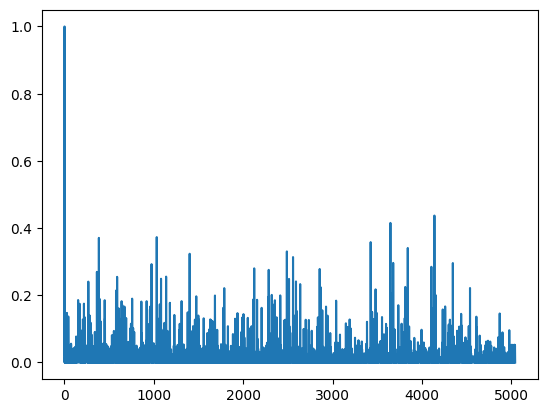

In [25]:
# Graficamos el grafico de similitud
plt.plot(similitud)

In [26]:
# Vamos a ordernar el grafico de similitud
(-similitud).argsort()

array([   3, 4139, 3647, ..., 2380, 2363, 5042])

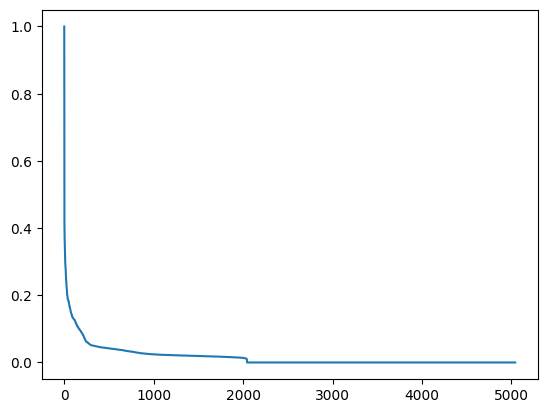

In [29]:
# Aquí graficaremos el gráfico de similitud ya ordenado
plt.plot(similitud[(-similitud).argsort()])

In [30]:
# Pondremos el Top 10 de peliculas que más se parecen a nuestra busqueda.
recomendacion = (-similitud).argsort()[1:11]
recomendacion

array([4139, 3647, 1034,  387, 3426, 3841, 2489, 1402, 2558, 3678])

In [31]:
df['movie_title'].iloc[recomendacion]

4139            AWOL-72 
3647           Deadfall 
1034            The One 
387     The Devil's Own 
3426            Swelter 
3841     Police Academy 
2489      Let's Be Cops 
1402    Lethal Weapon 3 
2558           Hot Fuzz 
3678     Mambo Italiano 
Name: movie_title, dtype: object